In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
data_long = pd.read_csv('gene_samples_FPKM.csv')
#data_long.drop('Unnamed: 0')
data_long.head()

,gene,samples,FPKM,title,tissue,metastasis
0,TSPAN6,CA.102548,0.93,tumor rep1,breast tumor,yes
1,TNMD,CA.102548,0.00,tumor rep1,breast tumor,yes
2,DPM1,CA.102548,0.00,tumor rep1,breast tumor,yes
3,SCYL3,CA.102548,5.78,tumor rep1,breast tumor,yes
4,C1orf112,CA.102548,2.83,tumor rep1,breast tumor,yes


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. barplot
data_filtered = data_long[data_long['gene'] == 'BRCA1']

# fig, ax = plt.subplots()
# dat_filtered.plot(x='samples', y='FPKM', kind='bar', ax=ax, color='tissue')
# plt.show()
data_filtered.head()

,gene,samples,FPKM,title,tissue,metastasis
310,BRCA1,CA.102548,30.37,tumor rep1,breast tumor,yes
20556,BRCA1,CA.104338,24.43,tumor rep2,breast tumor,yes
40802,BRCA1,CA.105094,43.58,tumor rep3,breast tumor,yes
61048,BRCA1,CA.109745,11.05,tumor rep4,breast tumor,no
81294,BRCA1,CA.1906415,3.38,tumor rep5,breast tumor,no


<AxesSubplot: xlabel='samples', ylabel='FPKM'>

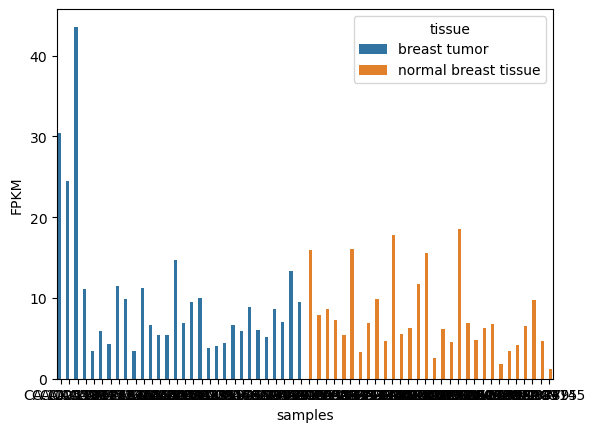

In [16]:
sns.barplot(data=data_filtered, x='samples', y='FPKM', hue='tissue')
#using ggplot % ggplot(., aes(x = samples, y = FPKM, fill = tissue)) +


<AxesSubplot: xlabel='FPKM', ylabel='Density'>

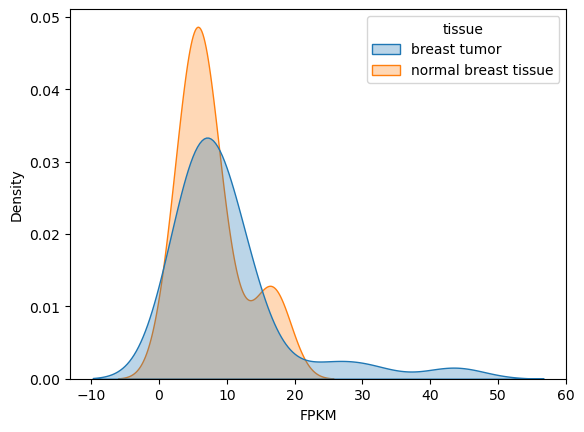

In [17]:
# density plot
sns.kdeplot(data=data_filtered, x='FPKM', hue='tissue', fill=True, alpha=0.3)
#ggplot(., aes(x = FPKM, fill = tissue)) geom_density(alpha = 0.3)

<AxesSubplot: xlabel='metastasis', ylabel='FPKM'>

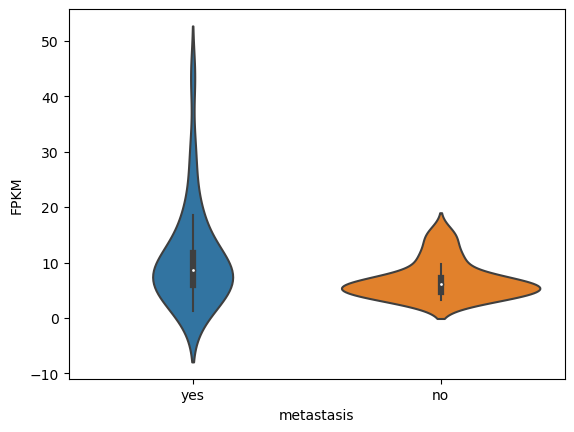

In [18]:
sns.violinplot(data=data_filtered, x='metastasis', y='FPKM')

In [48]:
data_filtered_1_2 = data_long[(data_long['gene'] == 'BRCA1') | (data_long['gene'] == 'BRCA2')]

In [47]:
#data_spread = data_filtered_1_2.pivot(index='samples', columns='gene', values='FPKM')
data_spread = data_filtered_1_2.pivot(index='gene', columns='samples', values='FPKM')
data_spread = data_spread.transpose()
data_spread

gene,BRCA1,BRCA2
samples,,
CA.102548,30.37,0.38
CA.104338,24.43,0.23
CA.105094,43.58,0.00
CA.109745,11.05,1.31
CA.1906415,3.38,0.53
CA.1912627,5.96,3.37
CA.1924346,4.26,1.21
CA.1926760,11.52,4.39
CA.1927842,9.87,3.91


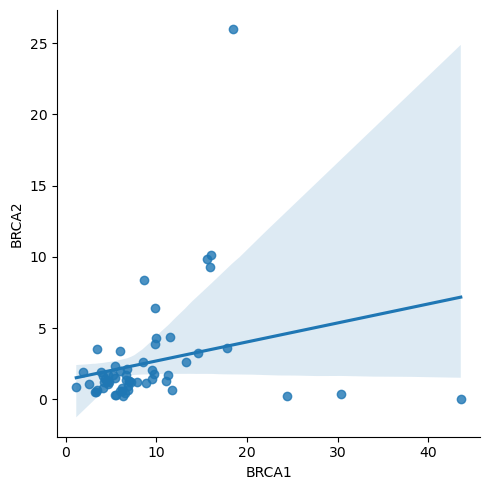

In [50]:
#sns.scatterplot(data=data_spread, x='BRCA1', y='BRCA2')
sns.lmplot(data=data_spread, x='BRCA1', y='BRCA2')

In [51]:
genes_of_interest = ['BRCA1', 'BRCA2', 'TP53', 'ALK', 'MYCN']

data_filtered = data_long.loc[data_long['gene'].isin(genes_of_interest)]
data_pivot = data_filtered.pivot(index='gene', columns='samples', values='FPKM')
data_pivot.head()

samples,CA.102548,CA.104338,CA.105094,CA.109745,CA.1906415,CA.1912627,CA.1924346,CA.1926760,CA.1927842,CA.1933414,...,CAP.2040686,CAP.2046297,CAP.2046641,CAP.348981,CAP.354300,CAP.359448,CAP.94377,CAP.98389,CAP.98475,CAP.99145
gene,,,,,,,,,,,,,,,,,,,,,
ALK,0.22,0.05,0.00,1.98,0.74,0.66,0.22,1.27,1.50,3.76,...,1.85,1.82,0.29,0.12,0.00,0.63,0.16,5.38,1.43,0.49
BRCA1,30.37,24.43,43.58,11.05,3.38,5.96,4.26,11.52,9.87,3.47,...,4.80,6.27,6.73,1.87,3.46,4.14,6.58,9.77,4.62,1.17
BRCA2,0.38,0.23,0.00,1.31,0.53,3.37,1.21,4.39,3.91,3.51,...,1.20,0.57,2.11,1.91,0.63,1.66,0.47,1.81,1.10,0.84
MYCN,0.38,0.00,0.00,0.94,0.37,0.55,0.81,0.46,0.48,4.22,...,2.14,0.87,0.59,1.20,0.48,0.28,0.26,0.75,0.13,0.46
TP53,38.27,29.34,16.09,22.91,20.56,27.81,14.35,87.82,117.87,34.07,...,31.10,39.32,38.47,42.37,25.08,32.68,6.54,34.37,40.71,30.50


<AxesSubplot: xlabel='samples', ylabel='gene'>

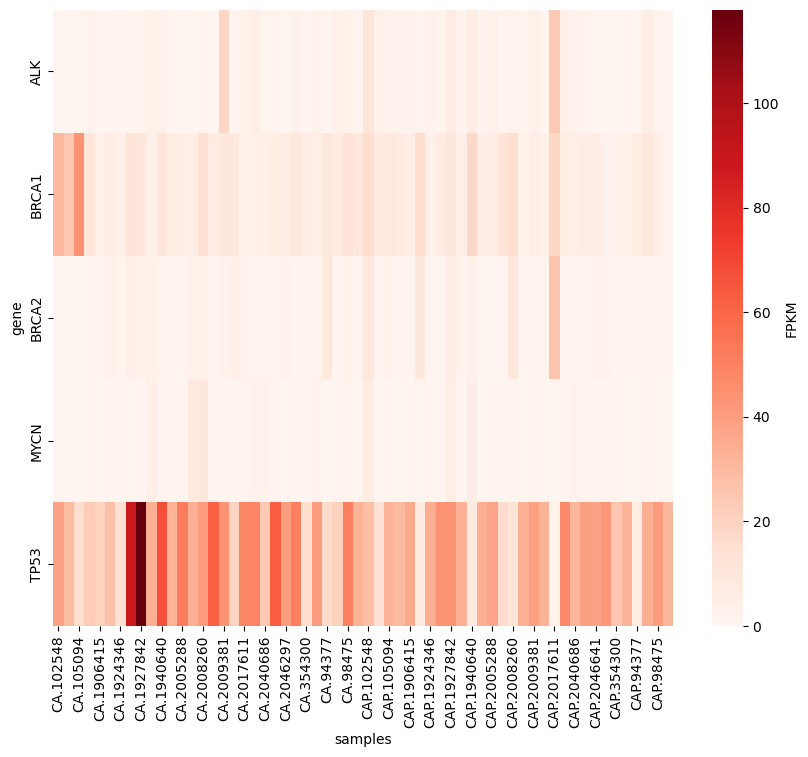

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=data_pivot, cmap='Reds', ax=ax, cbar_kws={'label': 'FPKM'})
##ggplot(., aes(x = samples, y = gene, fill = FPKM)) +